## Import libraries

In [ ]:
# for data analysis
import numpy as np 
import pandas as pd

# to visualize data
from matplotlib import pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

%matplotlib inline

## Read data from the CSV file

In [ ]:
# load dataset from the google drive
url='https://drive.google.com/file/d/1yFKIb7GCgKPWR-g7q8DZTLzXOCVxd99n/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
dataset_df=pd.read_csv(url)

In [ ]:
# get the shape of the dataset
rows,cols=dataset_df.shape

print('No of rows = ',rows)
print('No of columns = ',cols)

No of rows =  840
No of columns =  24


In [ ]:
# first 10 data records
dataset_df.head(10)

,Sex,Age,Living_Area,Height/m,Weight/kg,vaccine_type,blood_group,Swelling,Redness,Itching,...,Coughing,Diarrhea,Nausea_and_vomiting,Breathlessness,Joint_Pain,Fainted,Anaphylactic_Reaction,Tingling,Swollen_Lymph_Nodes,Symptoms_time
0,Male,51,Downtown,1.71,82,Sinopharm,A+,No,No,No,...,No,No,No,No,No,No,No,No,No,None
1,Female,45,Downtown,1.47,55,Astrazeneca,B+,No,No,No,...,No,No,No,No,No,No,No,No,No,None
2,Male,56,Downtown,1.51,59,Sinopharm,B-,No,No,No,...,No,No,No,No,No,No,No,No,No,< 24 hours
3,Male,27,Downtown,1.60,90,Astrazeneca,AB-,No,No,No,...,No,No,No,No,No,No,No,No,No,None
4,Female,31,Downtown,1.48,83,Sinopharm,AB+,No,No,No,...,Yes,No,No,No,No,No,No,No,No,< 24 hours
5,Male,48,Downtown,1.61,59,Moderna,O-,No,No,No,...,No,No,No,No,No,No,No,No,No,< 24 hours
6,Female,49,Downtown,1.54,59,Moderna,A+,No,No,No,...,No,No,No,No,No,No,No,No,No,None
7,Female,57,Downtown,1.65,74,Moderna,AB+,No,No,No,...,No,No,No,No,No,No,No,No,No,None
8,Female,36,Downtown,1.87,89,Sinopharm,B-,No,No,No,...,No,No,No,No,No,No,No,No,No,24-72 hours
9,Male,54,Downtown,1.61,97,Sinopharm,O+,No,No,No,...,No,No,No,No,No,No,No,No,No,< 24 hours


## Analysis

### Vaccine Type vs total number of people

In [ ]:
# vaccine count
vaccine_count_df=dataset_df.groupby('vaccine_type',as_index=False).agg('count')
vaccine_count_df.head()

,vaccine_type,Sex,Age,Living_Area,Height/m,Weight/kg,blood_group,Swelling,Redness,Itching,...,Coughing,Diarrhea,Nausea_and_vomiting,Breathlessness,Joint_Pain,Fainted,Anaphylactic_Reaction,Tingling,Swollen_Lymph_Nodes,Symptoms_time
0,Astrazeneca,140,140,140,140,140,140,140,140,140,...,140,140,140,140,140,140,140,140,140,140
1,Moderna,158,158,158,158,158,158,158,158,158,...,158,158,158,158,158,158,158,158,158,158
2,Pfizer,186,186,186,186,186,186,186,186,186,...,186,186,186,186,186,186,186,186,186,186
3,Sinopharm,356,356,356,356,356,356,356,356,356,...,356,356,356,356,356,356,356,356,356,356


In [ ]:
# define x and y axis
vaccine_count=len(vaccine_count_df)
x1=range(vaccine_count) 

y1=vaccine_count_df['Age']

 
vaccineType=vaccine_count_df['vaccine_type']


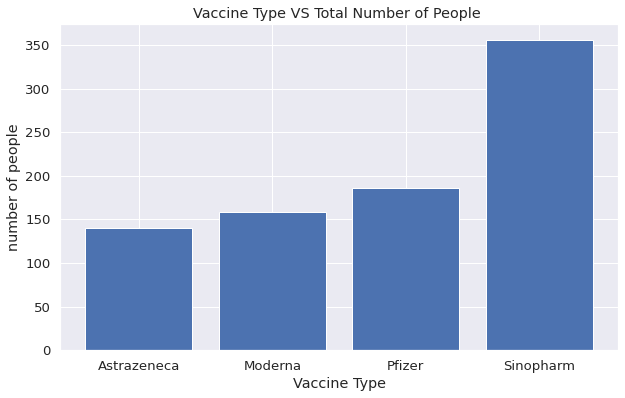

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(x1,y1,color='b')
plt.title('Vaccine Type VS Total Number of People ')
plt.xlabel('Vaccine Type')
plt.ylabel('number of people')

plt.xticks(x1,vaccineType);


plt.savefig('plot1.png', dpi=400, bbox_inches ='tight')



#                            graphs on different side effects

### a function to get number of people who infected with different side effects

In [ ]:
# a function to get number of people who infected with any side effect

# global variables

x2=['Sinopharm','Astrazeneca','Pfizer','Moderna']  # vaccine type
y2=[0,0,0,0]  # no of people who infected with swelling
b2=dataset_df['vaccine_type']
c2=dataset_df['Sex']

male=[0,0,0,0]
female=[0,0,0,0]


def get_no_of_people(a2):

  y2=[0,0,0,0]  # no of people who infected with swelling
  male=[0,0,0,0]
  female=[0,0,0,0]
  for i in range(len(b2)):

    if(a2[i]=='Yes'):

      if(b2[i]=='Sinopharm'):

        y2[0]=y2[0]+1

        if(c2[i]=='Male'):
          male[0]=male[0]+1
        else:
          female[0]=female[0]+1

      elif(b2[i]=='Astrazeneca'):

        y2[1]=y2[1]+1

        
        if(c2[i]=='Male'):
          male[1]=male[1]+1
        else:
          female[1]=female[1]+1

      elif(b2[i]=='Pfizer'):

        y2[2]=y2[2]+1

        
        if(c2[i]=='Male'):
          male[2]=male[2]+1
        else:
          female[2]=female[2]+1

      else :

        y2[3]=y2[3]+1

        
        if(c2[i]=='Male'):
          male[3]=male[3]+1
        else:
          female[3]=female[3]+1

  return y2,male,female


  


## Number of people who infected with swelling Vs vaccine type


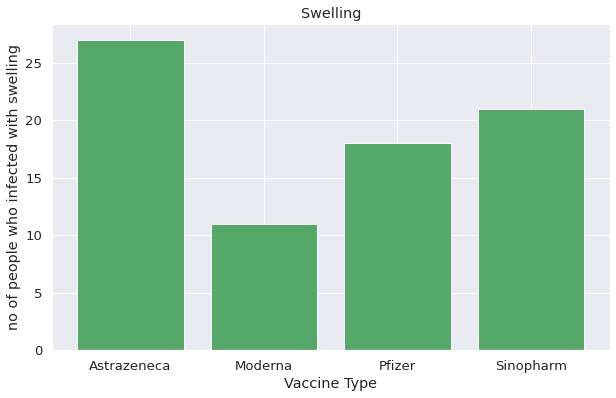

In [ ]:

a2=dataset_df['Swelling']

y2,male,female=get_no_of_people(a2)

plt.figure(figsize=(10,6))
plt.bar(x2,y2,color='g')
plt.title('Swelling')
plt.xlabel('Vaccine Type')
plt.ylabel('no of people who infected with swelling')

plt.xticks(x1,vaccineType);
plt.savefig('swelling1.png', dpi=400, bbox_inches ='tight')


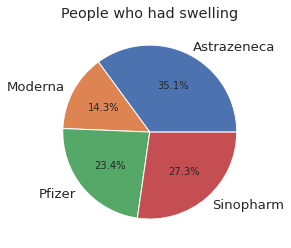

<Figure size 432x288 with 0 Axes>

In [ ]:
# print(y2)
labels1=['Astrazeneca','Moderna','Pfizer','Sinopharm']
plt.title('People who had swelling')
plt.pie(y2,labels=labels1,autopct='%1.1f%%')
plt.show()
plt.savefig('swelling2.png')

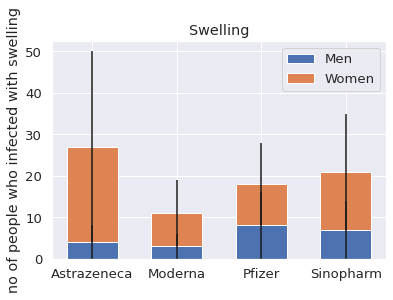

<Figure size 432x288 with 0 Axes>

In [ ]:
fig, ax = plt.subplots()

ax.bar(labels1, male, width=0.6, yerr=male, label='Men')
ax.bar(labels1, female, width=0.6, yerr=female, bottom=male,
       label='Women')

ax.set_ylabel('no of people who infected with swelling')
ax.set_title('Swelling')
ax.legend()

plt.show()
plt.savefig('swelling3.png')

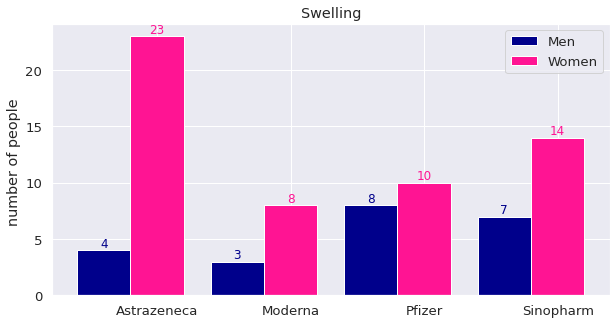

<Figure size 432x288 with 0 Axes>

In [ ]:
width=0.4

fig, ax = plt.subplots(figsize=(10,5))
rects1 = ax.bar(np.arange(len(labels1)) - width/2, male, width, label='Men',color='darkblue')
rects2 = ax.bar( np.arange(len(labels1))+ width/2, female, width, label='Women',color='deeppink')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('number of people ')
ax.set_title('Swelling')
ax.set_xticks(np.arange(len(labels1))+width/2)
ax.set_xticklabels(labels1)


ax.legend()

for bar in ax.patches:
  # The text annotation for each bar should be its height.
  bar_value = bar.get_height()
  # Format the text with commas to separate thousands. You can do
  # any type of formatting here though.
  text = f'{bar_value:,}'
  # This will give the middle of each bar on the x-axis.
  text_x = bar.get_x() + bar.get_width() / 2
  # get_y() is where the bar starts so we add the height to it.
  text_y = bar.get_y() + bar_value
  # If we want the text to be the same color as the bar, we can
  # get the color like so:
  bar_color = bar.get_facecolor()
  # If you want a consistent color, you can just set it as a constant, e.g. #222222
  ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color,
          size=12)


plt.show()
plt.savefig('swelling4.png')



## number of people who infected with redness Vs Vaccine type

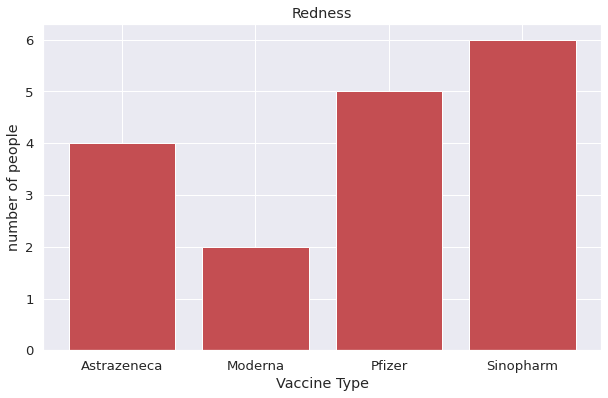

In [ ]:
a2=dataset_df['Redness']
y2,male,female=get_no_of_people(a2)

plt.figure(figsize=(10,6))
plt.bar(x2,y2,color='r')
plt.title('Redness')
plt.xlabel('Vaccine Type')
plt.ylabel('number of people')

plt.xticks(x1,vaccineType);
plt.savefig('redness1.png', dpi=400, bbox_inches ='tight')


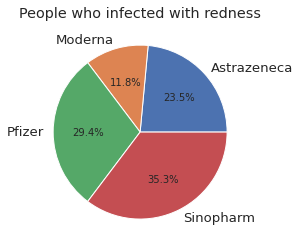

<Figure size 432x288 with 0 Axes>

In [ ]:
labels1=['Astrazeneca','Moderna','Pfizer','Sinopharm']
plt.title('People who infected with redness')
plt.pie(y2,labels=labels1,autopct='%1.1f%%')
plt.show()
plt.savefig('redness2.png')

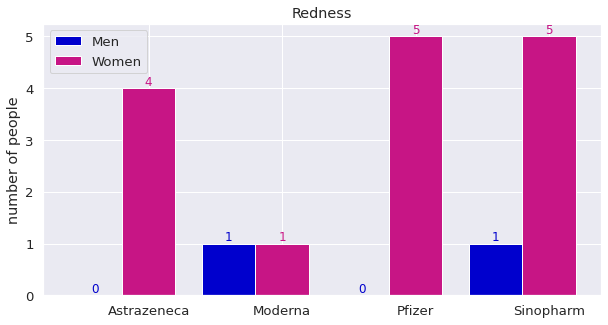

<Figure size 432x288 with 0 Axes>

In [ ]:
width=0.4

fig, ax = plt.subplots(figsize=(10,5))
rects1 = ax.bar(np.arange(len(labels1)) - width/2, male, width, label='Men',color='mediumblue')
rects2 = ax.bar( np.arange(len(labels1))+ width/2, female, width, label='Women',color='mediumvioletred')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('number of people')
ax.set_title('Redness')
ax.set_xticks(np.arange(len(labels1))+width/2)
ax.set_xticklabels(labels1)


ax.legend()

for bar in ax.patches:
  # The text annotation for each bar should be its height.
  bar_value = bar.get_height()
  # Format the text with commas to separate thousands. You can do
  # any type of formatting here though.
  text = f'{bar_value:,}'
  # This will give the middle of each bar on the x-axis.
  text_x = bar.get_x() + bar.get_width() / 2
  # get_y() is where the bar starts so we add the height to it.
  text_y = bar.get_y() + bar_value
  # If we want the text to be the same color as the bar, we can
  # get the color like so:
  bar_color = bar.get_facecolor()
  # If you want a consistent color, you can just set it as a constant, e.g. #222222
  ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color,
          size=12)


plt.show()
plt.savefig('redness3.png')


## number of people who infected with fever

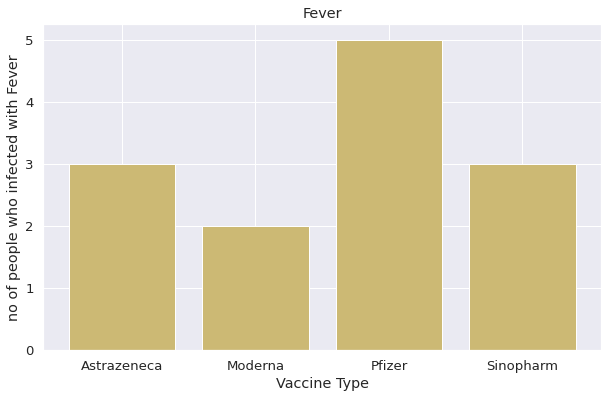

In [ ]:
a2=dataset_df['Fever']
y2,male,female=get_no_of_people(a2)

plt.figure(figsize=(10,6))
plt.bar(x2,y2,color='y')
plt.title('Fever')
plt.xlabel('Vaccine Type')
plt.ylabel('no of people who infected with Fever')

plt.xticks(x1,vaccineType);
plt.savefig('fever1.png', dpi=400, bbox_inches ='tight')

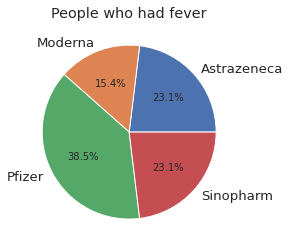

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.title('People who had fever')
plt.pie(y2,labels=labels1,autopct='%1.1f%%')
plt.show()
plt.savefig('fever2.png')

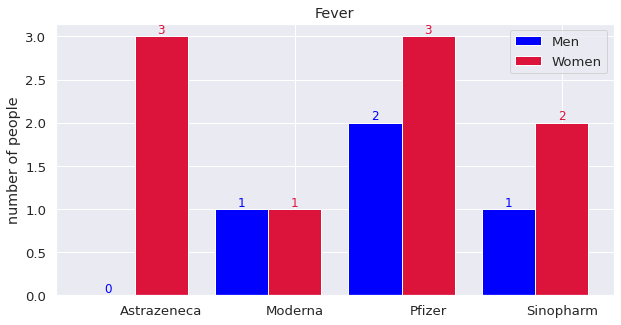

<Figure size 432x288 with 0 Axes>

In [ ]:
width=0.4

fig, ax = plt.subplots(figsize=(10,5))
rects1 = ax.bar(np.arange(len(labels1)) - width/2, male, width, label='Men',color='blue')
rects2 = ax.bar( np.arange(len(labels1))+ width/2, female, width, label='Women',color='crimson')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('number of people')
ax.set_title('Fever')
ax.set_xticks(np.arange(len(labels1))+width/2)
ax.set_xticklabels(labels1)


ax.legend()

for bar in ax.patches:
  # The text annotation for each bar should be its height.
  bar_value = bar.get_height()
  # Format the text with commas to separate thousands. You can do
  # any type of formatting here though.
  text = f'{bar_value:,}'
  # This will give the middle of each bar on the x-axis.
  text_x = bar.get_x() + bar.get_width() / 2
  # get_y() is where the bar starts so we add the height to it.
  text_y = bar.get_y() + bar_value
  # If we want the text to be the same color as the bar, we can
  # get the color like so:
  bar_color = bar.get_facecolor()
  # If you want a consistent color, you can just set it as a constant, e.g. #222222
  ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color,
          size=12)


plt.show()
plt.savefig('fever3.png')


## number of people who had headache

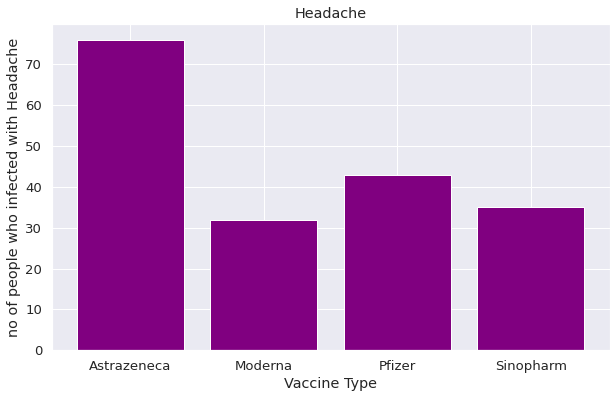

In [ ]:

a2=dataset_df['Headache']
y2,male,female=get_no_of_people(a2)

plt.figure(figsize=(10,6))
plt.bar(x2,y2,color='purple')
plt.title('Headache')
plt.xlabel('Vaccine Type')
plt.ylabel('no of people who infected with Headache')

plt.xticks(x1,vaccineType);
plt.savefig('headache1.png', dpi=400, bbox_inches ='tight')

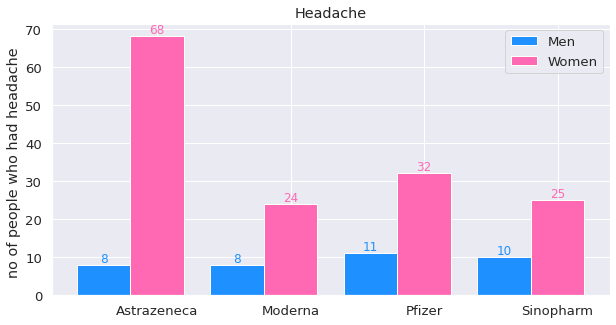

<Figure size 432x288 with 0 Axes>

In [ ]:
width=0.4

fig, ax = plt.subplots(figsize=(10,5))
rects1 = ax.bar(np.arange(len(labels1)) - width/2, male, width, label='Men',color='dodgerblue')
rects2 = ax.bar( np.arange(len(labels1))+ width/2, female, width, label='Women',color='hotpink')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('no of people who had headache ')
ax.set_title('Headache')
ax.set_xticks(np.arange(len(labels1))+width/2)
ax.set_xticklabels(labels1)


ax.legend()

for bar in ax.patches:
  # The text annotation for each bar should be its height.
  bar_value = bar.get_height()
  # Format the text with commas to separate thousands. You can do
  # any type of formatting here though.
  text = f'{bar_value:,}'
  # This will give the middle of each bar on the x-axis.
  text_x = bar.get_x() + bar.get_width() / 2
  # get_y() is where the bar starts so we add the height to it.
  text_y = bar.get_y() + bar_value
  # If we want the text to be the same color as the bar, we can
  # get the color like so:
  bar_color = bar.get_facecolor()
  # If you want a consistent color, you can just set it as a constant, e.g. #222222
  ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color,
          size=12)


plt.show()
plt.savefig('headache2.png')


## no of people who had muscle pain

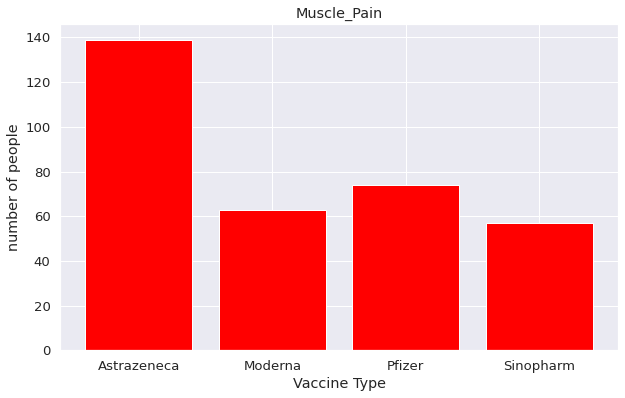

In [ ]:

a2=dataset_df['Muscle_Pain']
y2,male,female=get_no_of_people(a2)

plt.figure(figsize=(10,6))
plt.bar(x2,y2,color='red')
plt.title('Muscle_Pain')
plt.xlabel('Vaccine Type')
plt.ylabel('number of people')

plt.xticks(x1,vaccineType);
plt.savefig('Muscle_Pain1.png', dpi=400, bbox_inches ='tight')

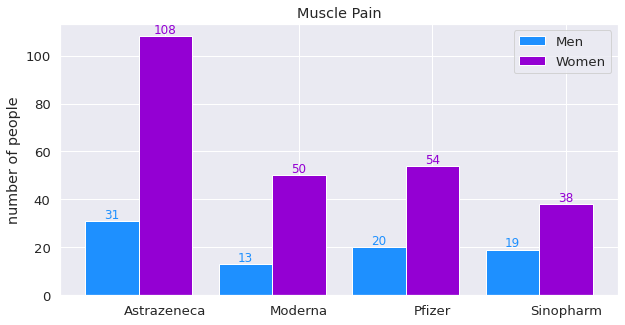

<Figure size 432x288 with 0 Axes>

In [ ]:
width=0.4

fig, ax = plt.subplots(figsize=(10,5))
rects1 = ax.bar(np.arange(len(labels1)) - width/2, male, width, label='Men',color='dodgerblue')
rects2 = ax.bar( np.arange(len(labels1))+ width/2, female, width, label='Women',color='darkviolet')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('number of people')
ax.set_title('Muscle Pain')
ax.set_xticks(np.arange(len(labels1))+width/2)
ax.set_xticklabels(labels1)


ax.legend()

for bar in ax.patches:
  # The text annotation for each bar should be its height.
  bar_value = bar.get_height()
  # Format the text with commas to separate thousands. You can do
  # any type of formatting here though.
  text = f'{bar_value:,}'
  # This will give the middle of each bar on the x-axis.
  text_x = bar.get_x() + bar.get_width() / 2
  # get_y() is where the bar starts so we add the height to it.
  text_y = bar.get_y() + bar_value
  # If we want the text to be the same color as the bar, we can
  # get the color like so:
  bar_color = bar.get_facecolor()
  # If you want a consistent color, you can just set it as a constant, e.g. #222222
  ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color,
          size=12)


plt.show()
plt.savefig('Muscle_Pain2.png')


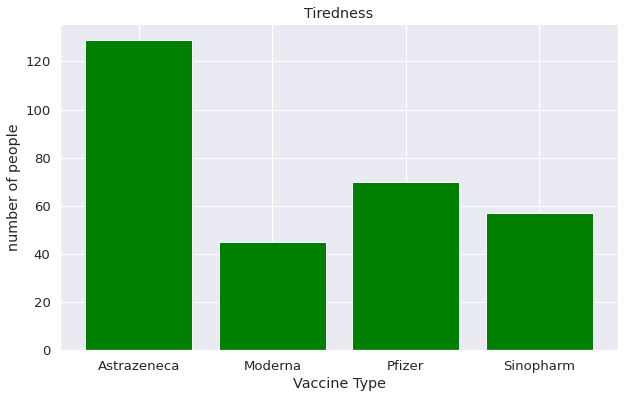

In [ ]:
# Tiredness


a2=dataset_df['Tiredness']
y2,male,female=get_no_of_people(a2)

plt.figure(figsize=(10,6))
plt.bar(x2,y2,color='green')
plt.title('Tiredness')
plt.xlabel('Vaccine Type')
plt.ylabel('number of people')

plt.xticks(x1,vaccineType);
plt.savefig('Tiredness1.png', dpi=400, bbox_inches ='tight')



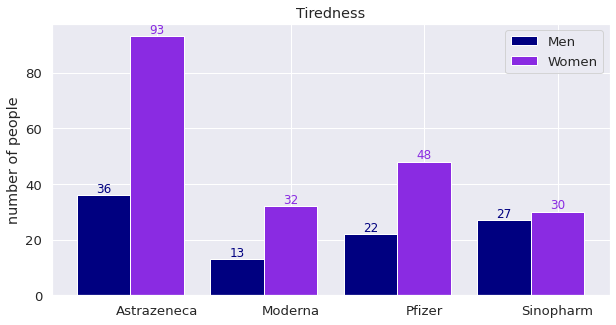

<Figure size 432x288 with 0 Axes>

In [ ]:
width=0.4

fig, ax = plt.subplots(figsize=(10,5))
rects1 = ax.bar(np.arange(len(labels1)) - width/2, male, width, label='Men',color='navy')
rects2 = ax.bar( np.arange(len(labels1))+ width/2, female, width, label='Women',color='blueviolet')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('number of people')
ax.set_title('Tiredness')
ax.set_xticks(np.arange(len(labels1))+width/2)
ax.set_xticklabels(labels1)


ax.legend()

for bar in ax.patches:
  # The text annotation for each bar should be its height.
  bar_value = bar.get_height()
  # Format the text with commas to separate thousands. You can do
  # any type of formatting here though.
  text = f'{bar_value:,}'
  # This will give the middle of each bar on the x-axis.
  text_x = bar.get_x() + bar.get_width() / 2
  # get_y() is where the bar starts so we add the height to it.
  text_y = bar.get_y() + bar_value
  # If we want the text to be the same color as the bar, we can
  # get the color like so:
  bar_color = bar.get_facecolor()
  # If you want a consistent color, you can just set it as a constant, e.g. #222222
  ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color,
          size=12)


plt.show()
plt.savefig('tiredness2.png')


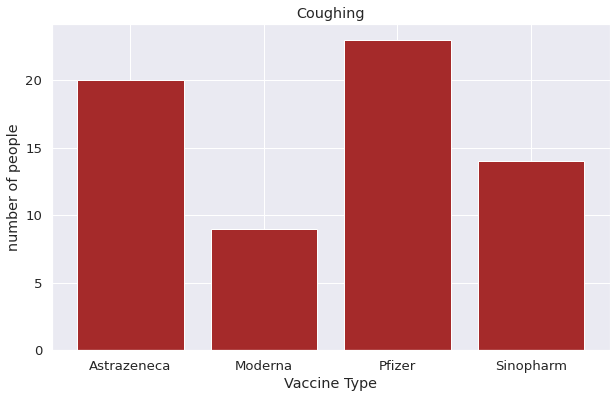

In [ ]:

# Coughing

a2=dataset_df['Coughing']
y2,male,female=get_no_of_people(a2)

plt.figure(figsize=(10,6))
plt.bar(x2,y2,color='brown')
plt.title('Coughing')
plt.xlabel('Vaccine Type')
plt.ylabel('number of people')

plt.xticks(x1,vaccineType);
plt.savefig('Coughing1.png', dpi=400, bbox_inches ='tight')



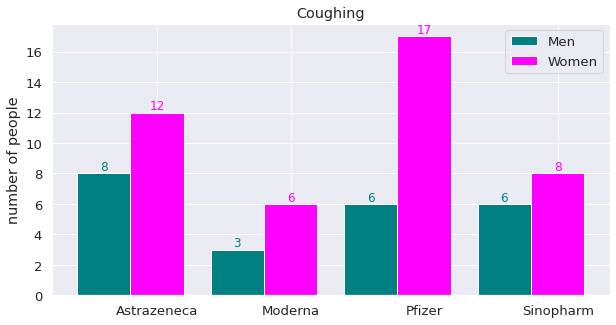

<Figure size 432x288 with 0 Axes>

In [ ]:
width=0.4

fig, ax = plt.subplots(figsize=(10,5))
rects1 = ax.bar(np.arange(len(labels1)) - width/2, male, width, label='Men',color='teal')
rects2 = ax.bar( np.arange(len(labels1))+ width/2, female, width, label='Women',color='fuchsia')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('number of people')
ax.set_title('Coughing')
ax.set_xticks(np.arange(len(labels1))+width/2)
ax.set_xticklabels(labels1)


ax.legend()

for bar in ax.patches:
  # The text annotation for each bar should be its height.
  bar_value = bar.get_height()
  # Format the text with commas to separate thousands. You can do
  # any type of formatting here though.
  text = f'{bar_value:,}'
  # This will give the middle of each bar on the x-axis.
  text_x = bar.get_x() + bar.get_width() / 2
  # get_y() is where the bar starts so we add the height to it.
  text_y = bar.get_y() + bar_value
  # If we want the text to be the same color as the bar, we can
  # get the color like so:
  bar_color = bar.get_facecolor()
  # If you want a consistent color, you can just set it as a constant, e.g. #222222
  ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color,
          size=12)


plt.show()
plt.savefig('Coughing2.png')


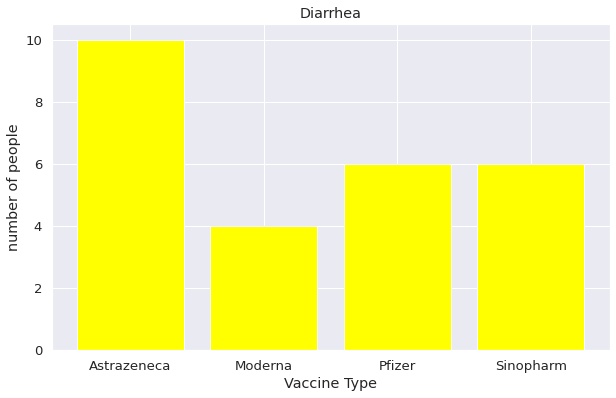

In [ ]:
# Diarrhea

a2=dataset_df['Diarrhea']
y2,male,female=get_no_of_people(a2)

plt.figure(figsize=(10,6))
plt.bar(x2,y2,color='Yellow')
plt.title('Diarrhea')
plt.xlabel('Vaccine Type')
plt.ylabel('number of people')

plt.xticks(x1,vaccineType);
plt.savefig('Diarrhea1.png', dpi=400, bbox_inches ='tight')

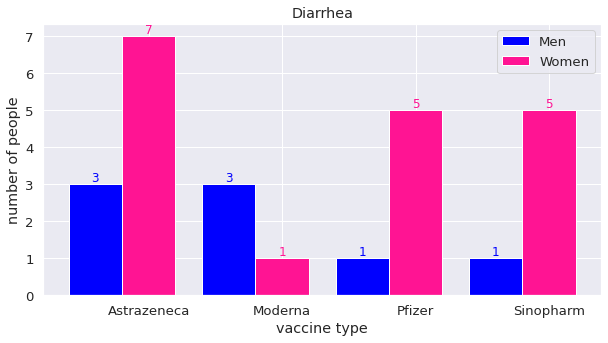

<Figure size 432x288 with 0 Axes>

In [ ]:
width=0.4

fig, ax = plt.subplots(figsize=(10,5))
rects1 = ax.bar(np.arange(len(labels1)) - width/2, male, width, label='Men',color='blue')
rects2 = ax.bar( np.arange(len(labels1))+ width/2, female, width, label='Women',color='deeppink')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('number of people')
ax.set_xlabel('vaccine type')
ax.set_title('Diarrhea')
ax.set_xticks(np.arange(len(labels1))+width/2)
ax.set_xticklabels(labels1)


ax.legend()

for bar in ax.patches:
  # The text annotation for each bar should be its height.
  bar_value = bar.get_height()
  # Format the text with commas to separate thousands. You can do
  # any type of formatting here though.
  text = f'{bar_value:,}'
  # This will give the middle of each bar on the x-axis.
  text_x = bar.get_x() + bar.get_width() / 2
  # get_y() is where the bar starts so we add the height to it.
  text_y = bar.get_y() + bar_value
  # If we want the text to be the same color as the bar, we can
  # get the color like so:
  bar_color = bar.get_facecolor()
  # If you want a consistent color, you can just set it as a constant, e.g. #222222
  ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color,
          size=12)


plt.show()
plt.savefig('Diarrhea2.png')

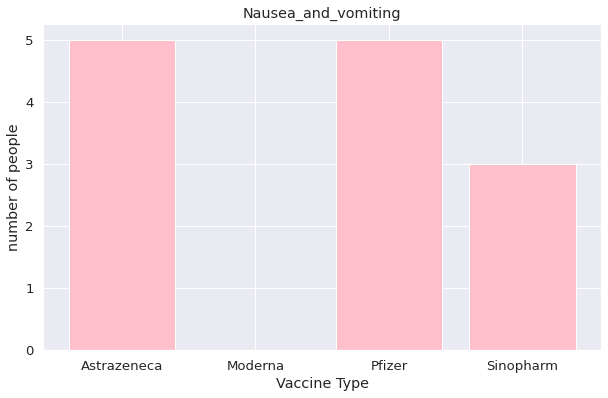

In [ ]:
# Nausea_and_vomiting

a2=dataset_df['Nausea_and_vomiting']
y2,male,female=get_no_of_people(a2)

plt.figure(figsize=(10,6))
plt.bar(x2,y2,color='pink')
plt.title('Nausea_and_vomiting')
plt.xlabel('Vaccine Type')
plt.ylabel('number of people')

plt.xticks(x1,vaccineType);
plt.savefig('Nausea_and_vomiting1.png', dpi=400, bbox_inches ='tight')


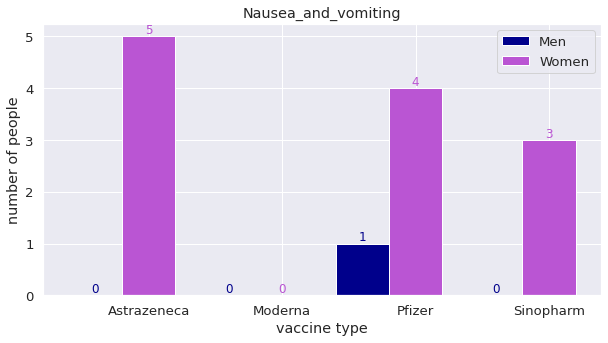

<Figure size 432x288 with 0 Axes>

In [ ]:
width=0.4

fig, ax = plt.subplots(figsize=(10,5))
rects1 = ax.bar(np.arange(len(labels1)) - width/2, male, width, label='Men',color='darkblue')
rects2 = ax.bar( np.arange(len(labels1))+ width/2, female, width, label='Women',color='mediumorchid')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('number of people')
ax.set_xlabel('vaccine type')
ax.set_title('Nausea_and_vomiting')
ax.set_xticks(np.arange(len(labels1))+width/2)
ax.set_xticklabels(labels1)


ax.legend()

for bar in ax.patches:
  # The text annotation for each bar should be its height.
  bar_value = bar.get_height()
  # Format the text with commas to separate thousands. You can do
  # any type of formatting here though.
  text = f'{bar_value:,}'
  # This will give the middle of each bar on the x-axis.
  text_x = bar.get_x() + bar.get_width() / 2
  # get_y() is where the bar starts so we add the height to it.
  text_y = bar.get_y() + bar_value
  # If we want the text to be the same color as the bar, we can
  # get the color like so:
  bar_color = bar.get_facecolor()
  # If you want a consistent color, you can just set it as a constant, e.g. #222222
  ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color,
          size=12)


plt.show()
plt.savefig('Nausea_and_vomiting2.png')

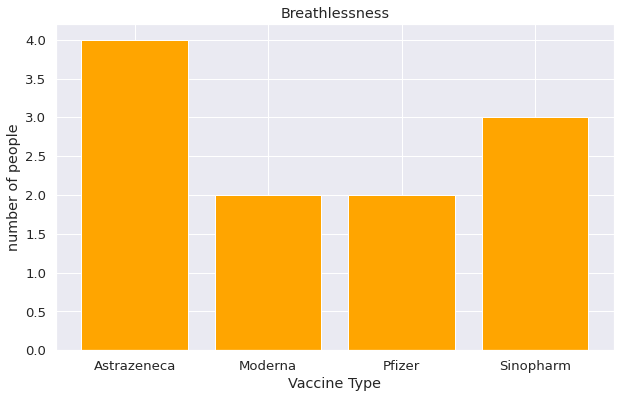

In [ ]:
# Breathlessness


a2=dataset_df['Breathlessness']
y2,male,female=get_no_of_people(a2)

plt.figure(figsize=(10,6))
plt.bar(x2,y2,color='orange')
plt.title('Breathlessness')
plt.xlabel('Vaccine Type')
plt.ylabel('number of people')

plt.xticks(x1,vaccineType);
plt.savefig('Breathlessness1.png', dpi=400, bbox_inches ='tight')

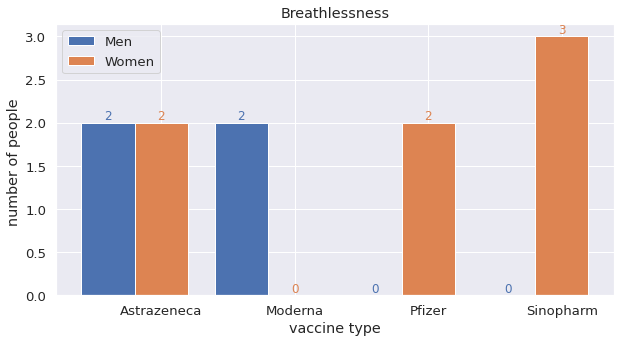

<Figure size 432x288 with 0 Axes>

In [ ]:
width=0.4

fig, ax = plt.subplots(figsize=(10,5))
rects1 = ax.bar(np.arange(len(labels1)) - width/2, male, width, label='Men')
rects2 = ax.bar( np.arange(len(labels1))+ width/2, female, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('number of people ')
ax.set_xlabel('vaccine type')
ax.set_title('Breathlessness')
ax.set_xticks(np.arange(len(labels1))+width/2)
ax.set_xticklabels(labels1)


ax.legend()

for bar in ax.patches:
  # The text annotation for each bar should be its height.
  bar_value = bar.get_height()
  # Format the text with commas to separate thousands. You can do
  # any type of formatting here though.
  text = f'{bar_value:,}'
  # This will give the middle of each bar on the x-axis.
  text_x = bar.get_x() + bar.get_width() / 2
  # get_y() is where the bar starts so we add the height to it.
  text_y = bar.get_y() + bar_value
  # If we want the text to be the same color as the bar, we can
  # get the color like so:
  bar_color = bar.get_facecolor()
  # If you want a consistent color, you can just set it as a constant, e.g. #222222
  ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color,
          size=12)


plt.show()
plt.savefig('Breathlessness2.png')

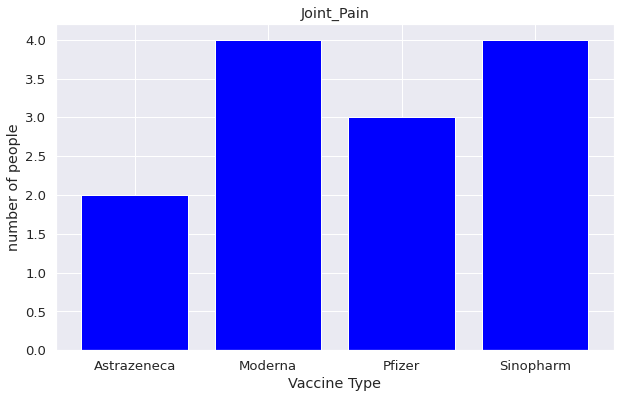

In [ ]:
# Joint_Pain

a2=dataset_df['Joint_Pain']
y2,male,female=get_no_of_people(a2)

plt.figure(figsize=(10,6))
plt.bar(x2,y2,color='blue')
plt.title('Joint_Pain')
plt.xlabel('Vaccine Type')
plt.ylabel('number of people')

plt.xticks(x1,vaccineType);
plt.savefig('Joint_Pain1.png', dpi=400, bbox_inches ='tight')

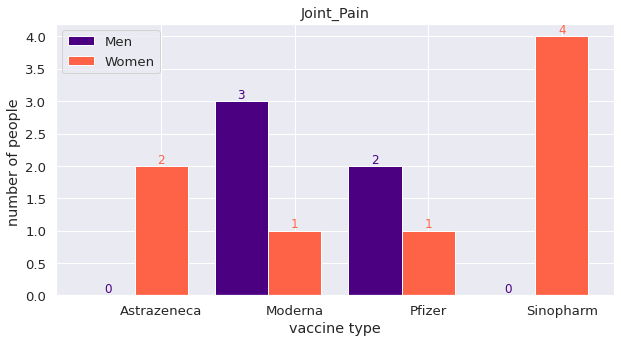

<Figure size 432x288 with 0 Axes>

In [ ]:
width=0.4

fig, ax = plt.subplots(figsize=(10,5))
rects1 = ax.bar(np.arange(len(labels1)) - width/2, male, width, label='Men',color='indigo')
rects2 = ax.bar( np.arange(len(labels1))+ width/2, female, width, label='Women',color='tomato')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('number of people ')
ax.set_xlabel('vaccine type')
ax.set_title('Joint_Pain')
ax.set_xticks(np.arange(len(labels1))+width/2)
ax.set_xticklabels(labels1)


ax.legend()

for bar in ax.patches:
  # The text annotation for each bar should be its height.
  bar_value = bar.get_height()
  # Format the text with commas to separate thousands. You can do
  # any type of formatting here though.
  text = f'{bar_value:,}'
  # This will give the middle of each bar on the x-axis.
  text_x = bar.get_x() + bar.get_width() / 2
  # get_y() is where the bar starts so we add the height to it.
  text_y = bar.get_y() + bar_value
  # If we want the text to be the same color as the bar, we can
  # get the color like so:
  bar_color = bar.get_facecolor()
  # If you want a consistent color, you can just set it as a constant, e.g. #222222
  ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color,
          size=12)


plt.show()
plt.savefig('Joint_Pain2.png')

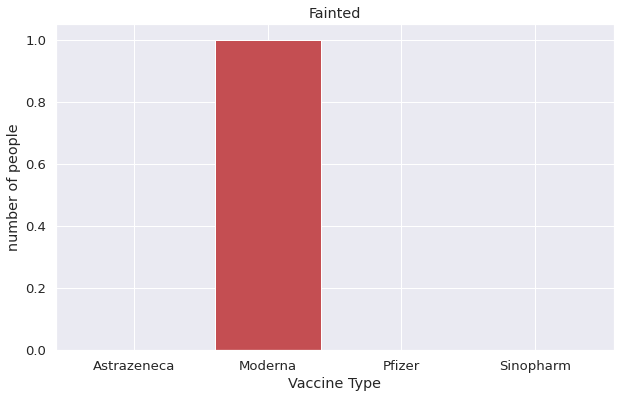

In [ ]:
# Fainted

a2=dataset_df['Fainted']
y2,male,female=get_no_of_people(a2)

plt.figure(figsize=(10,6))
plt.bar(x2,y2,color='r')
plt.title('Fainted')
plt.xlabel('Vaccine Type')
plt.ylabel('number of people')

plt.xticks(x1,vaccineType);
plt.savefig('Fainted1.png', dpi=400, bbox_inches ='tight')

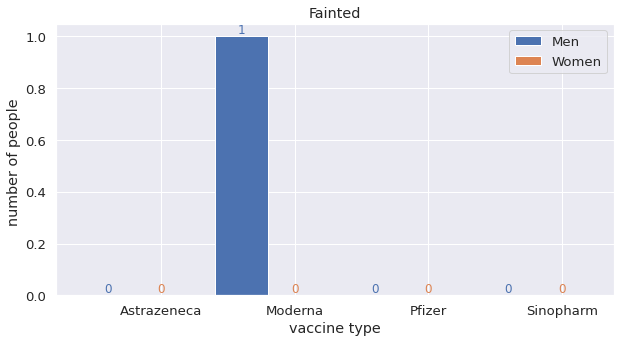

<Figure size 432x288 with 0 Axes>

In [ ]:
width=0.4

fig, ax = plt.subplots(figsize=(10,5))
rects1 = ax.bar(np.arange(len(labels1)) - width/2, male, width, label='Men')
rects2 = ax.bar( np.arange(len(labels1))+ width/2, female, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('number of people ')
ax.set_xlabel('vaccine type')
ax.set_title('Fainted')
ax.set_xticks(np.arange(len(labels1))+width/2)
ax.set_xticklabels(labels1)


ax.legend()

for bar in ax.patches:
  # The text annotation for each bar should be its height.
  bar_value = bar.get_height()
  # Format the text with commas to separate thousands. You can do
  # any type of formatting here though.
  text = f'{bar_value:,}'
  # This will give the middle of each bar on the x-axis.
  text_x = bar.get_x() + bar.get_width() / 2
  # get_y() is where the bar starts so we add the height to it.
  text_y = bar.get_y() + bar_value
  # If we want the text to be the same color as the bar, we can
  # get the color like so:
  bar_color = bar.get_facecolor()
  # If you want a consistent color, you can just set it as a constant, e.g. #222222
  ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color,
          size=12)


plt.show()
plt.savefig('Fainted2.png')

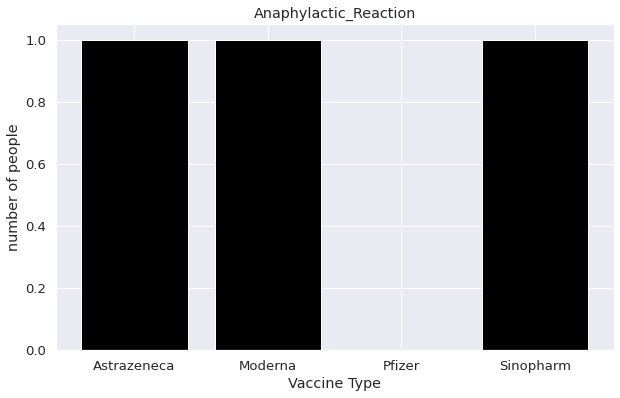

In [ ]:
# Anaphylactic_Reaction

a2=dataset_df['Anaphylactic_Reaction']
y2,male,female=get_no_of_people(a2)

plt.figure(figsize=(10,6))
plt.bar(x2,y2,color='black')
plt.title('Anaphylactic_Reaction')
plt.xlabel('Vaccine Type')
plt.ylabel('number of people')

plt.xticks(x1,vaccineType);
plt.savefig('Anaphylactic_Reaction.png', dpi=400, bbox_inches ='tight')


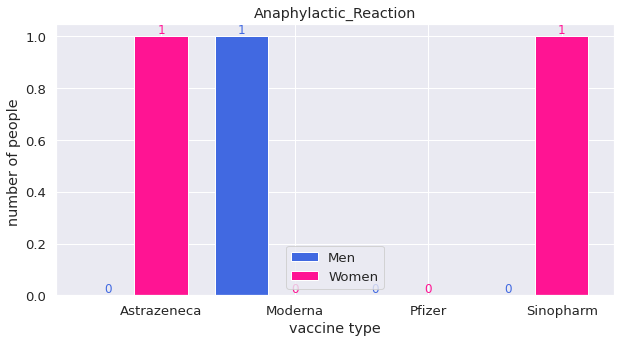

<Figure size 432x288 with 0 Axes>

In [ ]:
width=0.4

fig, ax = plt.subplots(figsize=(10,5))
rects1 = ax.bar(np.arange(len(labels1)) - width/2, male, width, label='Men',color='royalblue')
rects2 = ax.bar( np.arange(len(labels1))+ width/2, female, width, label='Women',color='deeppink')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('number of people ')
ax.set_xlabel('vaccine type')
ax.set_title('Anaphylactic_Reaction')
ax.set_xticks(np.arange(len(labels1))+width/2)
ax.set_xticklabels(labels1)


ax.legend()

for bar in ax.patches:
  # The text annotation for each bar should be its height.
  bar_value = bar.get_height()
  # Format the text with commas to separate thousands. You can do
  # any type of formatting here though.
  text = f'{bar_value:,}'
  # This will give the middle of each bar on the x-axis.
  text_x = bar.get_x() + bar.get_width() / 2
  # get_y() is where the bar starts so we add the height to it.
  text_y = bar.get_y() + bar_value
  # If we want the text to be the same color as the bar, we can
  # get the color like so:
  bar_color = bar.get_facecolor()
  # If you want a consistent color, you can just set it as a constant, e.g. #222222
  ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color,
          size=12)


plt.show()
plt.savefig('Anaphylactic_Reaction2.png')

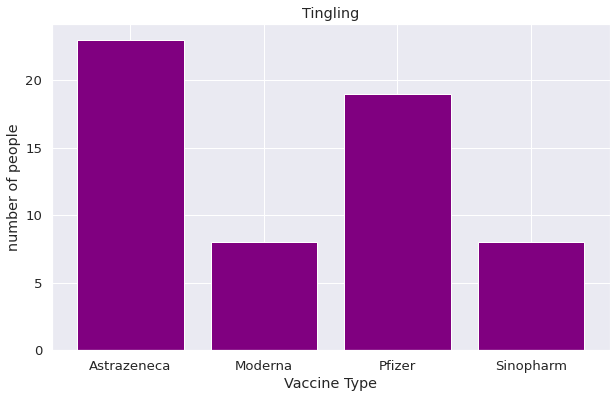

In [ ]:
# Tingling


a2=dataset_df['Tingling']
y2,male,female=get_no_of_people(a2)

plt.figure(figsize=(10,6))
plt.bar(x2,y2,color='purple')
plt.title('Tingling')
plt.xlabel('Vaccine Type')
plt.ylabel('number of people')

plt.xticks(x1,vaccineType);
plt.savefig('Tingling1.png', dpi=400, bbox_inches ='tight')

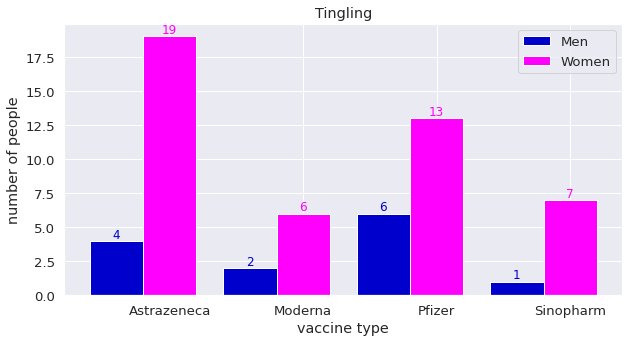

<Figure size 432x288 with 0 Axes>

In [ ]:
width=0.4

fig, ax = plt.subplots(figsize=(10,5))
rects1 = ax.bar(np.arange(len(labels1)) - width/2, male, width, label='Men',color='mediumblue')
rects2 = ax.bar( np.arange(len(labels1))+ width/2, female, width, label='Women',color='magenta')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('number of people')
ax.set_xlabel('vaccine type')
ax.set_title('Tingling')
ax.set_xticks(np.arange(len(labels1))+width/2)
ax.set_xticklabels(labels1)


ax.legend()

for bar in ax.patches:
  # The text annotation for each bar should be its height.
  bar_value = bar.get_height()
  # Format the text with commas to separate thousands. You can do
  # any type of formatting here though.
  text = f'{bar_value:,}'
  # This will give the middle of each bar on the x-axis.
  text_x = bar.get_x() + bar.get_width() / 2
  # get_y() is where the bar starts so we add the height to it.
  text_y = bar.get_y() + bar_value
  # If we want the text to be the same color as the bar, we can
  # get the color like so:
  bar_color = bar.get_facecolor()
  # If you want a consistent color, you can just set it as a constant, e.g. #222222
  ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color,
          size=12)


plt.show()
plt.savefig('Tingling2.png')

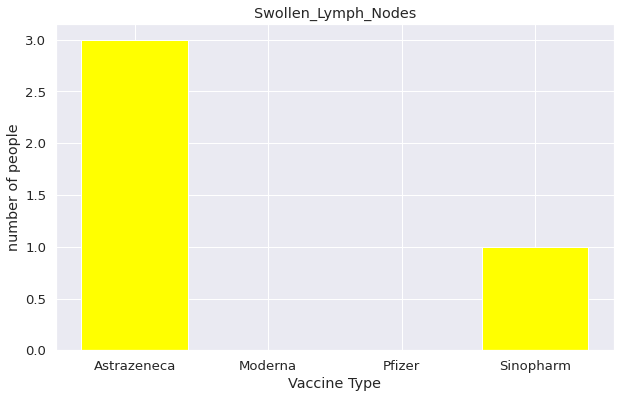

In [ ]:
# Swollen_Lymph_Nodes

a2=dataset_df['Swollen_Lymph_Nodes']
y2,male,female=get_no_of_people(a2)

plt.figure(figsize=(10,6))
plt.bar(x2,y2,color='yellow')
plt.title('Swollen_Lymph_Nodes')
plt.xlabel('Vaccine Type')
plt.ylabel('number of people')

plt.xticks(x1,vaccineType);
plt.savefig('Swollen_Lymph_Nodes.png', dpi=400, bbox_inches ='tight')

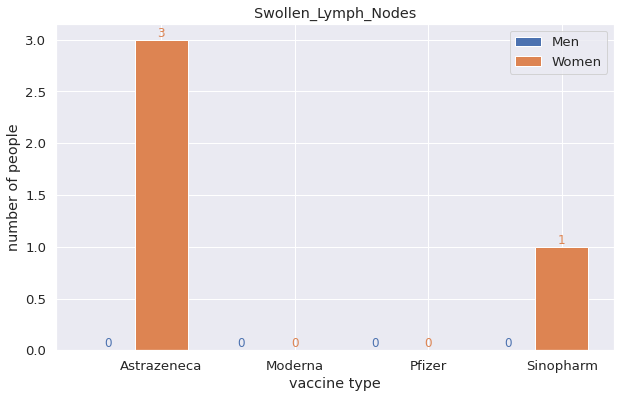

<Figure size 432x288 with 0 Axes>

In [ ]:
width=0.4

fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(np.arange(len(labels1)) - width/2, male, width, label='Men')
rects2 = ax.bar( np.arange(len(labels1))+ width/2, female, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('number of people')
ax.set_xlabel('vaccine type')
ax.set_title('Swollen_Lymph_Nodes')
ax.set_xticks(np.arange(len(labels1))+width/2)
ax.set_xticklabels(labels1)


ax.legend()

for bar in ax.patches:
  # The text annotation for each bar should be its height.
  bar_value = bar.get_height()
  # Format the text with commas to separate thousands. You can do
  # any type of formatting here though.
  text = f'{bar_value:,}'
  # This will give the middle of each bar on the x-axis.
  text_x = bar.get_x() + bar.get_width() / 2
  # get_y() is where the bar starts so we add the height to it.
  text_y = bar.get_y() + bar_value
  # If we want the text to be the same color as the bar, we can
  # get the color like so:
  bar_color = bar.get_facecolor()
  # If you want a consistent color, you can just set it as a constant, e.g. #222222
  ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color,
          size=12)


plt.show()
plt.savefig('Swollen_Lymph_Nodes2.png')